In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/이미지분석/

/content/drive/My Drive/이미지분석


In [ ]:
!unzip train.zip

Archive:  train.zip
   creating: train/
   creating: train/dog/
  inflating: train/dog/pic_001.jpg   
  inflating: train/dog/pic_002.jpg   
  inflating: train/dog/pic_003.jpg   
  inflating: train/dog/pic_004.jpg   
  inflating: train/dog/pic_005.jpg   
  inflating: train/dog/pic_006.jpg   
  inflating: train/dog/pic_007.jpg   
  inflating: train/dog/pic_008.jpg   
  inflating: train/dog/pic_009.jpg   
  inflating: train/dog/pic_010.jpg   
  inflating: train/dog/pic_011.jpg   
  inflating: train/dog/pic_012.jpg   
  inflating: train/dog/pic_013.jpg   
  inflating: train/dog/pic_014.jpg   
  inflating: train/dog/pic_015.jpg   
  inflating: train/dog/pic_016.jpg   
  inflating: train/dog/pic_017.jpg   
  inflating: train/dog/pic_018.jpg   
  inflating: train/dog/pic_019.jpg   
  inflating: train/dog/pic_020.jpg   
  inflating: train/dog/pic_021.jpg   
  inflating: train/dog/pic_022.jpg   
  inflating: train/dog/pic_023.jpg   
  inflating: train/dog/pic_024.jpg   
  inflating: train/dog/p

In [ ]:
!unzip test.zip

Archive:  test.zip
   creating: test/
   creating: test/0/
  inflating: test/0/0001.jpg         
  inflating: test/0/0002.jpg         
  inflating: test/0/0003.jpg         
  inflating: test/0/0004.jpg         
  inflating: test/0/0005.jpg         
  inflating: test/0/0006.jpg         
  inflating: test/0/0007.jpg         
  inflating: test/0/0008.jpg         
  inflating: test/0/0009.jpg         
  inflating: test/0/0010.jpg         
  inflating: test/0/0011.jpg         
  inflating: test/0/0012.jpg         
  inflating: test/0/0013.jpg         
  inflating: test/0/0014.jpg         
  inflating: test/0/0015.jpg         
  inflating: test/0/0016.jpg         
  inflating: test/0/0017.jpg         
  inflating: test/0/0018.jpg         
  inflating: test/0/0019.jpg         
  inflating: test/0/0020.jpg         
  inflating: test/0/0021.jpg         
  inflating: test/0/0022.jpg         
  inflating: test/0/0023.jpg         
  inflating: test/0/0024.jpg         
  inflating: test/0/0025.jpg 

In [3]:
!pip install -U efficientnet

     |████████████████████████████████| 51kB 1.5MB/s 


In [4]:
import os
from datetime import datetime
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import efficientnet.keras as efn

In [5]:
path = '/content/drive/My Drive/이미지분석/train/'

IMG_HEIGHT = 227
IMG_WIDTH = 227
BATCH_SIZE = 64

In [6]:
train_datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    rescale=1./255,
    validation_split=0.2
)
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical',
    seed=123,
    batch_size=BATCH_SIZE,
    subset='training'
)

validation_generator = validation_datagen.flow_from_directory(
    path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical',
    seed=123,
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 1361 images belonging to 7 classes.
Found 337 images belonging to 7 classes.


In [ ]:
# import cv2
# import numpy as np
# sharpening_2 = np.array([[-1, -1, -1, -1, -1],
#                          [-1, 2, 2, 2, -1],
#                          [-1, 2, 9, 2, -1],
#                          [-1, 2, 2, 2, -1],
#                          [-1, -1, -1, -1, -1]]) / 9.0

# for x, y in train_generator:
#   for i in range(len(x)):
#     x[i] = cv2.filter2D(x[i],-1, sharpening_2)

# for x, y in validation_generator:
#   for i in range(len(x)):
#     x[i] = cv2.filter2D(x[i],-1, sharpening_2)
                  

(64, 227, 227, 3) (64, 7)


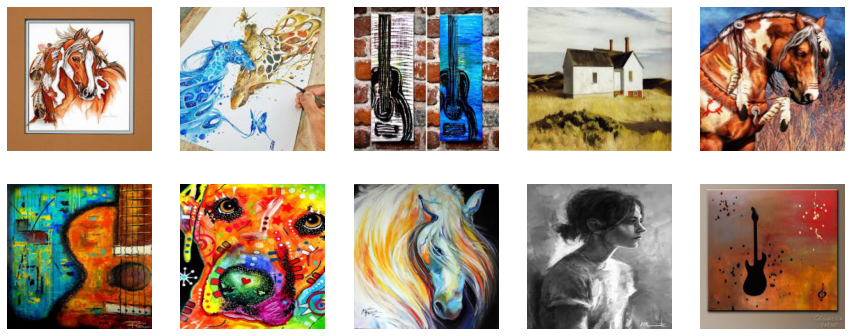

In [7]:
 for x, y in validation_generator:
    print(x.shape, y.shape)
    
    fig, axes = plt.subplots(2, 5)
    fig.set_size_inches(15, 6)
    for i in range(10):
        axes[i//5, i%5].imshow(x[i])
        axes[i//5, i%5].axis('off')
    plt.show()
    break

In [8]:
efficientNet = efn.EfficientNetB0(include_top=False, weights='imagenet', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

x = efficientNet.layers[-1].output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(7, activation='softmax')(x)

model = tf.keras.Model(efficientNet.input, x)

for layer in model.layers[:-30]:
  layer.trainable = False
for layer in model.layers[-30:]:
  layer.trainable = True


model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

model.summary()

16809984/16804768 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 227, 227, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 114, 114, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 114, 114, 32) 128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 114, 114, 32) 0           stem_bn[0][0]                    
_____________________________

In [9]:
os.makedirs('models', exist_ok=True)
start_time = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

cp_earlystop = EarlyStopping(monitor='val_loss',
                             mode='min',
                             patience=5,
                             verbose=1)

cp_callback = ModelCheckpoint('models/%s-{epoch:02d}-{val_loss:.2f}.h5' % (start_time),
                              monitor='val_loss',
                              save_best_only=True,
                              mode='min', 
                              verbose=1)

In [10]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=len(train_generator),
                              epochs = 50,
                              validation_data = validation_generator,
                              validation_steps = len(validation_generator),
                              callbacks=[cp_earlystop, cp_callback])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
22/22 [==============================] - 904s 40s/step - loss: 3.7634 - accuracy: 0.3238 - val_loss: 0.5523 - val_accuracy: 0.8546

Epoch 00001: val_loss improved from inf to 0.55227, saving model to models/2021-05-25_15-46-35-01-0.55.h5
Epoch 2/50
22/22 [==============================] - 25s 1s/step - loss: 0.8695 - accuracy: 0.7247 - val_loss: 0.4709 - val_accuracy: 0.8872

Epoch 00002: val_loss improved from 0.55227 to 0.47091, saving model to models/2021-05-25_15-46-35-02-0.47.h5
Epoch 3/50
22/22 [==============================] - 24s 1s/step - loss: 0.6839 - accuracy: 0.7820 - val_loss: 0.3589 - val_accuracy: 0.9139

Epoch 00003: val_loss improved from 0.47091 to 0.35887, saving model to models/2021-05-25_15-46-35-03-0.36.h5
Epoch 4/50
22/22 [==============================] - 25s 1s/step - loss: 0.4737 - accuracy: 0.8451 - val_loss: 0.3672 - val_accuracy: 0.9318

Epoch 00004: val_loss did not improve from 0.35887
Epoch 5/50
22/22 [==============================] - 23s 1

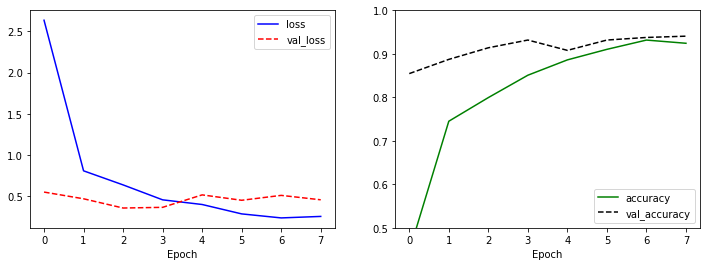

In [11]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.5, 1)
plt.legend()

plt.show()

In [ ]:
from keras.models import load_model

best_model = load_model('models/2021-05-23_03-22-19-01-3.42.h5')

In [ ]:
best_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 227, 227, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 114, 114, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 114, 114, 32) 128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 114, 114, 32) 0           stem_bn[0][0]                    
____________________________________________________________________________________________

In [ ]:
preds = model.predict_generator()

In [ ]:
path = '/content/drive/My Drive/이미지분석/test/'
test_generator = validation_datagen.flow_from_directory(
    path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode=None,
    seed=123,
    shuffle=False,
    batch_size=BATCH_SIZE,
)
preds = best_model.predict_generator(test_generator)


Found 350 images belonging to 1 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
import numpy as np
import pandas as pd
test = pd.read_csv('test_answer_sample_.csv')
test

,Unnamed: 0,answer value
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
345,345,0
346,346,0
347,347,0
348,348,0


In [ ]:
test['answer value'] = np.argmax(preds,axis=-1)
test.to_csv('test_answer_sample_3.csv',index=False)
test

,Unnamed: 0,answer value
0,0,6
1,1,3
2,2,4
3,3,6
4,4,6
...,...,...
345,345,6
346,346,0
347,347,3
348,348,6


In [ ]:
!pwd

/content/drive/My Drive/이미지분석


In [ ]:
import numpy as np
np.argmax(preds,axis=-1)

array([2, 3, 3, 6, 3, 3, 0, 4, 3, 1, 6, 2, 6, 2, 3, 1, 2, 0, 6, 3, 3, 5,
       2, 2, 1, 5, 1, 2, 0, 5, 0, 5, 6, 2, 0, 5, 5, 4, 5, 2, 2, 1, 2, 2,
       4, 3, 0, 5, 5, 5, 6, 5, 4, 1, 5, 6, 4, 3, 1, 0, 6, 0, 6, 1, 1, 2,
       1, 1, 1, 3, 2, 4, 0, 1, 1, 6, 2, 0, 3, 4, 1, 6, 2, 6, 6, 4, 2, 1,
       1, 6, 2, 5, 1, 0, 5, 6, 3, 3, 1, 6, 0, 6, 6, 0, 6, 2, 5, 3, 0, 2,
       4, 6, 2, 5, 2, 2, 0, 1, 5, 6, 4, 2, 5, 6, 2, 1, 5, 6, 1, 4, 1, 1,
       6, 4, 4, 2, 5, 6, 5, 0, 4, 3, 1, 5, 1, 5, 4, 0, 2, 5, 6, 1, 6, 3,
       2, 2, 0, 1, 4, 5, 2, 1, 6, 2, 2, 4, 1, 5, 6, 2, 1, 5, 3, 2, 0, 3,
       2, 5, 3, 4, 2, 0, 3, 6, 0, 3, 3, 2, 0, 4, 4, 2, 2, 4, 4, 6, 6, 6,
       3, 6, 5, 5, 4, 6, 2, 1, 3, 6, 0, 2, 3, 1, 1, 3, 0, 5, 2, 2, 0, 0,
       6, 1, 4, 2, 1, 4, 3, 2, 5, 4, 1, 5, 0, 0, 4, 1, 0, 1, 4, 6, 1, 1,
       6, 1, 5, 0, 5, 4, 6, 2, 4, 2, 5, 3, 1, 4, 2, 3, 4, 0, 6, 0, 2, 0,
       2, 4, 4, 4, 0, 1, 1, 5, 6, 4, 6, 2, 4, 4, 3, 6, 2, 1, 0, 3, 2, 3,
       1, 0, 5, 2, 5, 5, 2, 5, 0, 6, 5, 1, 5, 3, 5,

In [ ]:
test

,Unnamed: 0,Unnamed: 0.1,answer value
0,0,0,2
1,1,1,3
2,2,2,3
3,3,3,6
4,4,4,3
...,...,...,...
345,345,345,6
346,346,346,2
347,347,347,3
348,348,348,5
